<a href="https://colab.research.google.com/github/QY428/Stock-Price-LSTM/blob/main/Stock_Price_Prediction(e.g.%20for_APPLE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Predict an equity price for a stock**
To predict the price of a stock in USA stock exchange based on the Close Price.
Using the **Long Short Term Memory (LSTM)** to predict the closing price of a company APPLE based on the past 60 days of stock closing price.

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
#! pip install yfinance
# Import and install the libraries required for the tasks
import math
#!pip install pandas_datareader 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Install Yahoo Finance Library
#pip install yfinance
import yfinance as yf


In [ ]:
import yfinance as yf

In [ ]:
# Download the Yahoo Finance data
df_yahoo = yf.download('AAPL',
                       start='2000-01-01',
                       end='2022-07-29',
                       progress=False)

In [ ]:
# Inspect the data (view the dataset)
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')
df_yahoo.head(30) # display top 30 samples (default number is 5)

Downloaded 5680 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,0.784880,163811200
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.854541,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.782494,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.793945,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725238,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.759592,460734400
2000-01-10,0.910714,0.912946,0.845982,0.872768,0.746232,505064000
2000-01-11,0.856585,0.887277,0.808036,0.828125,0.708062,441548800
2000-01-12,0.848214,0.852679,0.772321,0.778460,0.665597,976068800


In [ ]:
# Inspect the data
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')
df_yahoo.tail(30) # display bottom 30 samples (latest samples)

Downloaded 5680 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134520300
2022-06-21,133.419998,137.059998,133.320007,135.869995,135.869995,81000500
2022-06-22,134.789993,137.759995,133.910004,135.350006,135.350006,73409200
2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800
2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89116800
2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900
2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400


In [ ]:
# display the shape of the dataset
df_yahoo.shape

(5680, 6)

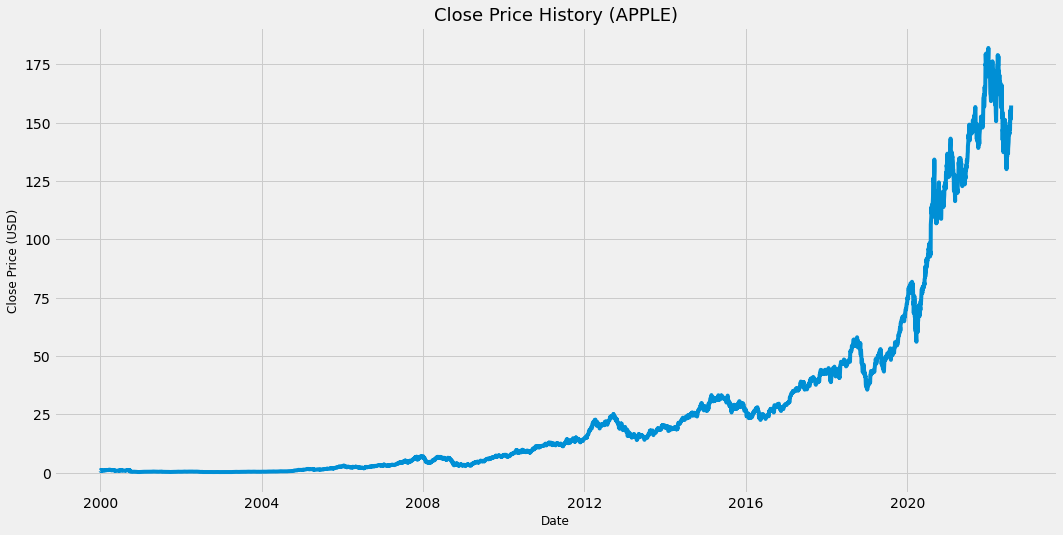

In [ ]:
# Visualise the record in the dataset in the form a graph (for closing price history for APPLE Inc.)
plt.figure(figsize=(16,8))
plt.title('Close Price History (APPLE)',fontsize=18)
plt.plot(df_yahoo['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price (USD)',fontsize=12)
plt.show()


## **Data Preprocessing**

In [ ]:
# Create a new dataframe with only "Close Price" column
data=df_yahoo.filter(['Close'])
# Converting the dataframe to a numpy array
dataset=data.values
# Decide the training dataset ratio to train the model (dataset splitting); allocate 90% for training set
training_data_len=math.ceil(len(dataset)*.9)


In [ ]:
# Data Normalising 
# Scale all the data to be values between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# Split the data into input and output dataset (x_train - input, y_train - output)
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])



In [ ]:
# Convert x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
# Reshape the data to be 3-dimensional form (no of samples, no of time steps, no of features) into the shape accepted by LSTM
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Building the Model
Build LSTM model to have two LSTM layers with 64 neurons and two Dense layers, one with 32 neurons and the other with 1 neuron.

In [ ]:
# Build LSTM model
model=Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(units=32))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the LSTM Model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
# Train the LSTM Model
model.fit(x_train,y_train,batch_size=1,epochs=5)


Epoch 1/5
5052/5052 [==============================] - 65s 13ms/step - loss: 4.9287e-05
Epoch 2/5
5052/5052 [==============================] - 65s 13ms/step - loss: 4.0666e-05
Epoch 3/5
5052/5052 [==============================] - 73s 14ms/step - loss: 3.7841e-05
Epoch 4/5
5052/5052 [==============================] - 72s 14ms/step - loss: 3.1936e-05
Epoch 5/5
5052/5052 [==============================] - 69s 14ms/step - loss: 3.2719e-05


In [ ]:
# Create test dataset
test_data=scaled_data[training_data_len-60:,:]
# Create test dataset for x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

# Convert the x_test set to a numpy array for use in LSTM model testing
x_test=np.array(x_test)
# Reshape the data into shape accepted by LSTM model
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

## Model Testing

In [ ]:
# Getting the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) # undo the scaling (normalising)
# Measure the model assessment  for accuracy
# Value of 0 means the model predicting value matching the actual value from the  test dataset perfectly; the lower the value the better the model performed.
# there are many metrics to value the performance of the model. Root Mean Square Error (RMSE) is used here.
# Calculate the value of RMSE as follows:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse
print("RMSE value :",rmse)

18/18 [==============================] - 1s 11ms/step
RMSE value : 10.263956716004634


## Data Testing
Model validation completed with acceptable prediction accuracy, data testing is launching now.

C:\Users\lianzt\AppData\Local\Temp\ipykernel_10664\690994780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


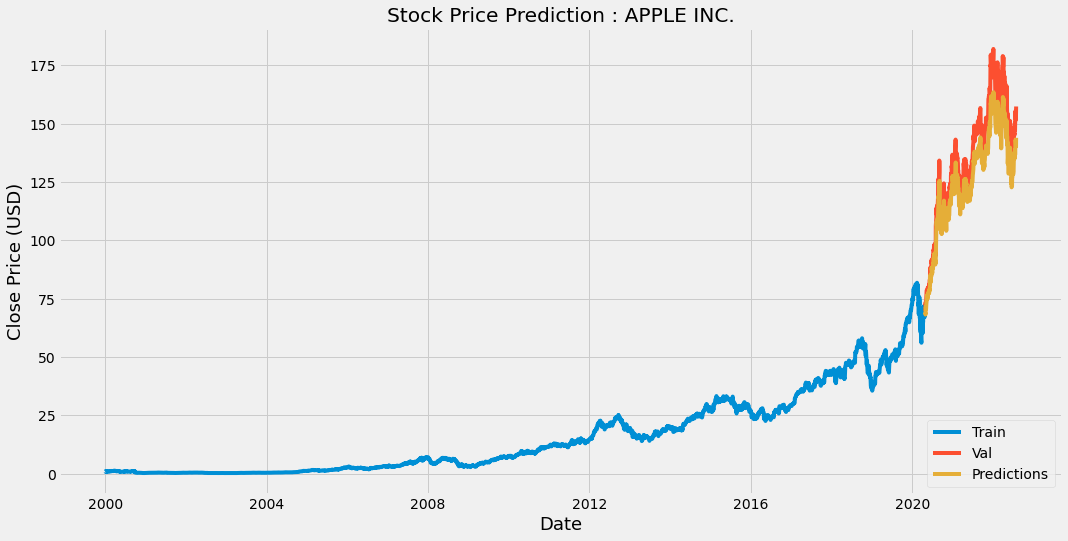

In [ ]:
# Create and plot the data for a graph
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction : APPLE INC.')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# Display the actual (valid) and predicted (close) prices
valid

,Close,Predictions
Date,,
2020-04-28,69.644997,69.096634
2020-04-29,71.932503,68.182152
2020-04-30,73.449997,70.012497
2020-05-01,72.267502,71.451866
2020-05-04,73.290001,70.615593
...,...,...
2022-07-22,154.089996,143.041656
2022-07-25,152.949997,142.243851
2022-07-26,151.600006,141.255692


In [ ]:
#!pip install yahoo_fin # (install it if not yet installed, currently it is already installed)
from yahoo_fin.stock_info import get_data
apple_quote = get_data("AAPL", start_date="2008-01-01", end_date="2022-06-29")
apple_quote

,open,high,low,close,adjclose,volume,ticker
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.949703,1079178800,AAPL
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.952452,842066400,AAPL
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.498070,1455832000,AAPL
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.424479,2072193200,AAPL
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.229350,1523816000,AAPL
...,...,...,...,...,...,...,...
2022-06-22,134.789993,137.759995,133.910004,135.350006,135.350006,73409200,AAPL
2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800,AAPL
2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89116800,AAPL
2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,AAPL


In [ ]:
pip install yahoo_fin

In [ ]:
# Get the quote 
apple_quote=yf.download('AAPL',data_source='yahoo',start='2021-12-06',end='2022-06-28')
# Create a new dataframe
new_df=apple_quote.filter(['Close'])
# Get the last 60 days of closing price
last_60_days=new_df[-60:].values
# Scale the data to be values between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
# Create an empty list
x_test1=[]
# Append the past 60 days
x_test1.append(last_60_days_scaled)
# Convert the x_test1 dataset to a numpy array
x_test1=np.array(x_test1)
# Reshape the data
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
# Get the predicted scaled price
pred_price=model.predict(x_test1)
# Undo the scaling /normalisation
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 17ms/step
[[132.1423]]


In [ ]:
# Extract the actual price of APPLE on a particular day
apple_quote_now=yf.download('AAPL',data_source='yahoo',start='2021-12-06',end='2022-06-28')
print("APPLE for the date (USD):",apple_quote_now['Close'])

[*********************100%***********************]  1 of 1 completed
APPLE for the date (USD): Date
2021-12-06    165.320007
2021-12-07    171.179993
2021-12-08    175.080002
2021-12-09    174.559998
2021-12-10    179.449997
                 ...    
2022-06-21    135.869995
2022-06-22    135.350006
2022-06-23    138.270004
2022-06-24    141.660004
2022-06-27    141.660004
Name: Close, Length: 140, dtype: float64
